<a href="https://colab.research.google.com/github/sudarshan-koirala/youtube-stuffs/blob/main/langchain/exploring_openai_v1_functionality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring OpenAI V1 functionality with LangChain

## [Youtube video covering this notebok](https://youtu.be/tEL0GP_HPuQ)

On 11.06.23 OpenAI released a number of new features, and along with it bumped their Python SDK to 1.0.0. This notebook shows off the new features and how to use them with LangChain.

## Install Libraries and Env Setup

In [ ]:
%%capture
# need openai>=1.1.0, langchain>=0.0.335, langchain-experimental>=0.0.39
!pip install -U openai langchain watermark langchain-experimental

In [ ]:
%load_ext watermark
%watermark -a "Sudarshan Koirala" -vmp langchain,openai

Author: Sudarshan Koirala

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

langchain: 0.0.340
openai   : 1.3.5

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 5.15.120+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit



In [ ]:
# import os
# # https://platform.openai.com/account/api-keys
# os.environ["OPENAI_API_KEY"] = "OPENAI_API_KEY"

## [Vision](https://platform.openai.com/docs/guides/vision)

OpenAI released multi-modal models, which can take a sequence of text and images as input.

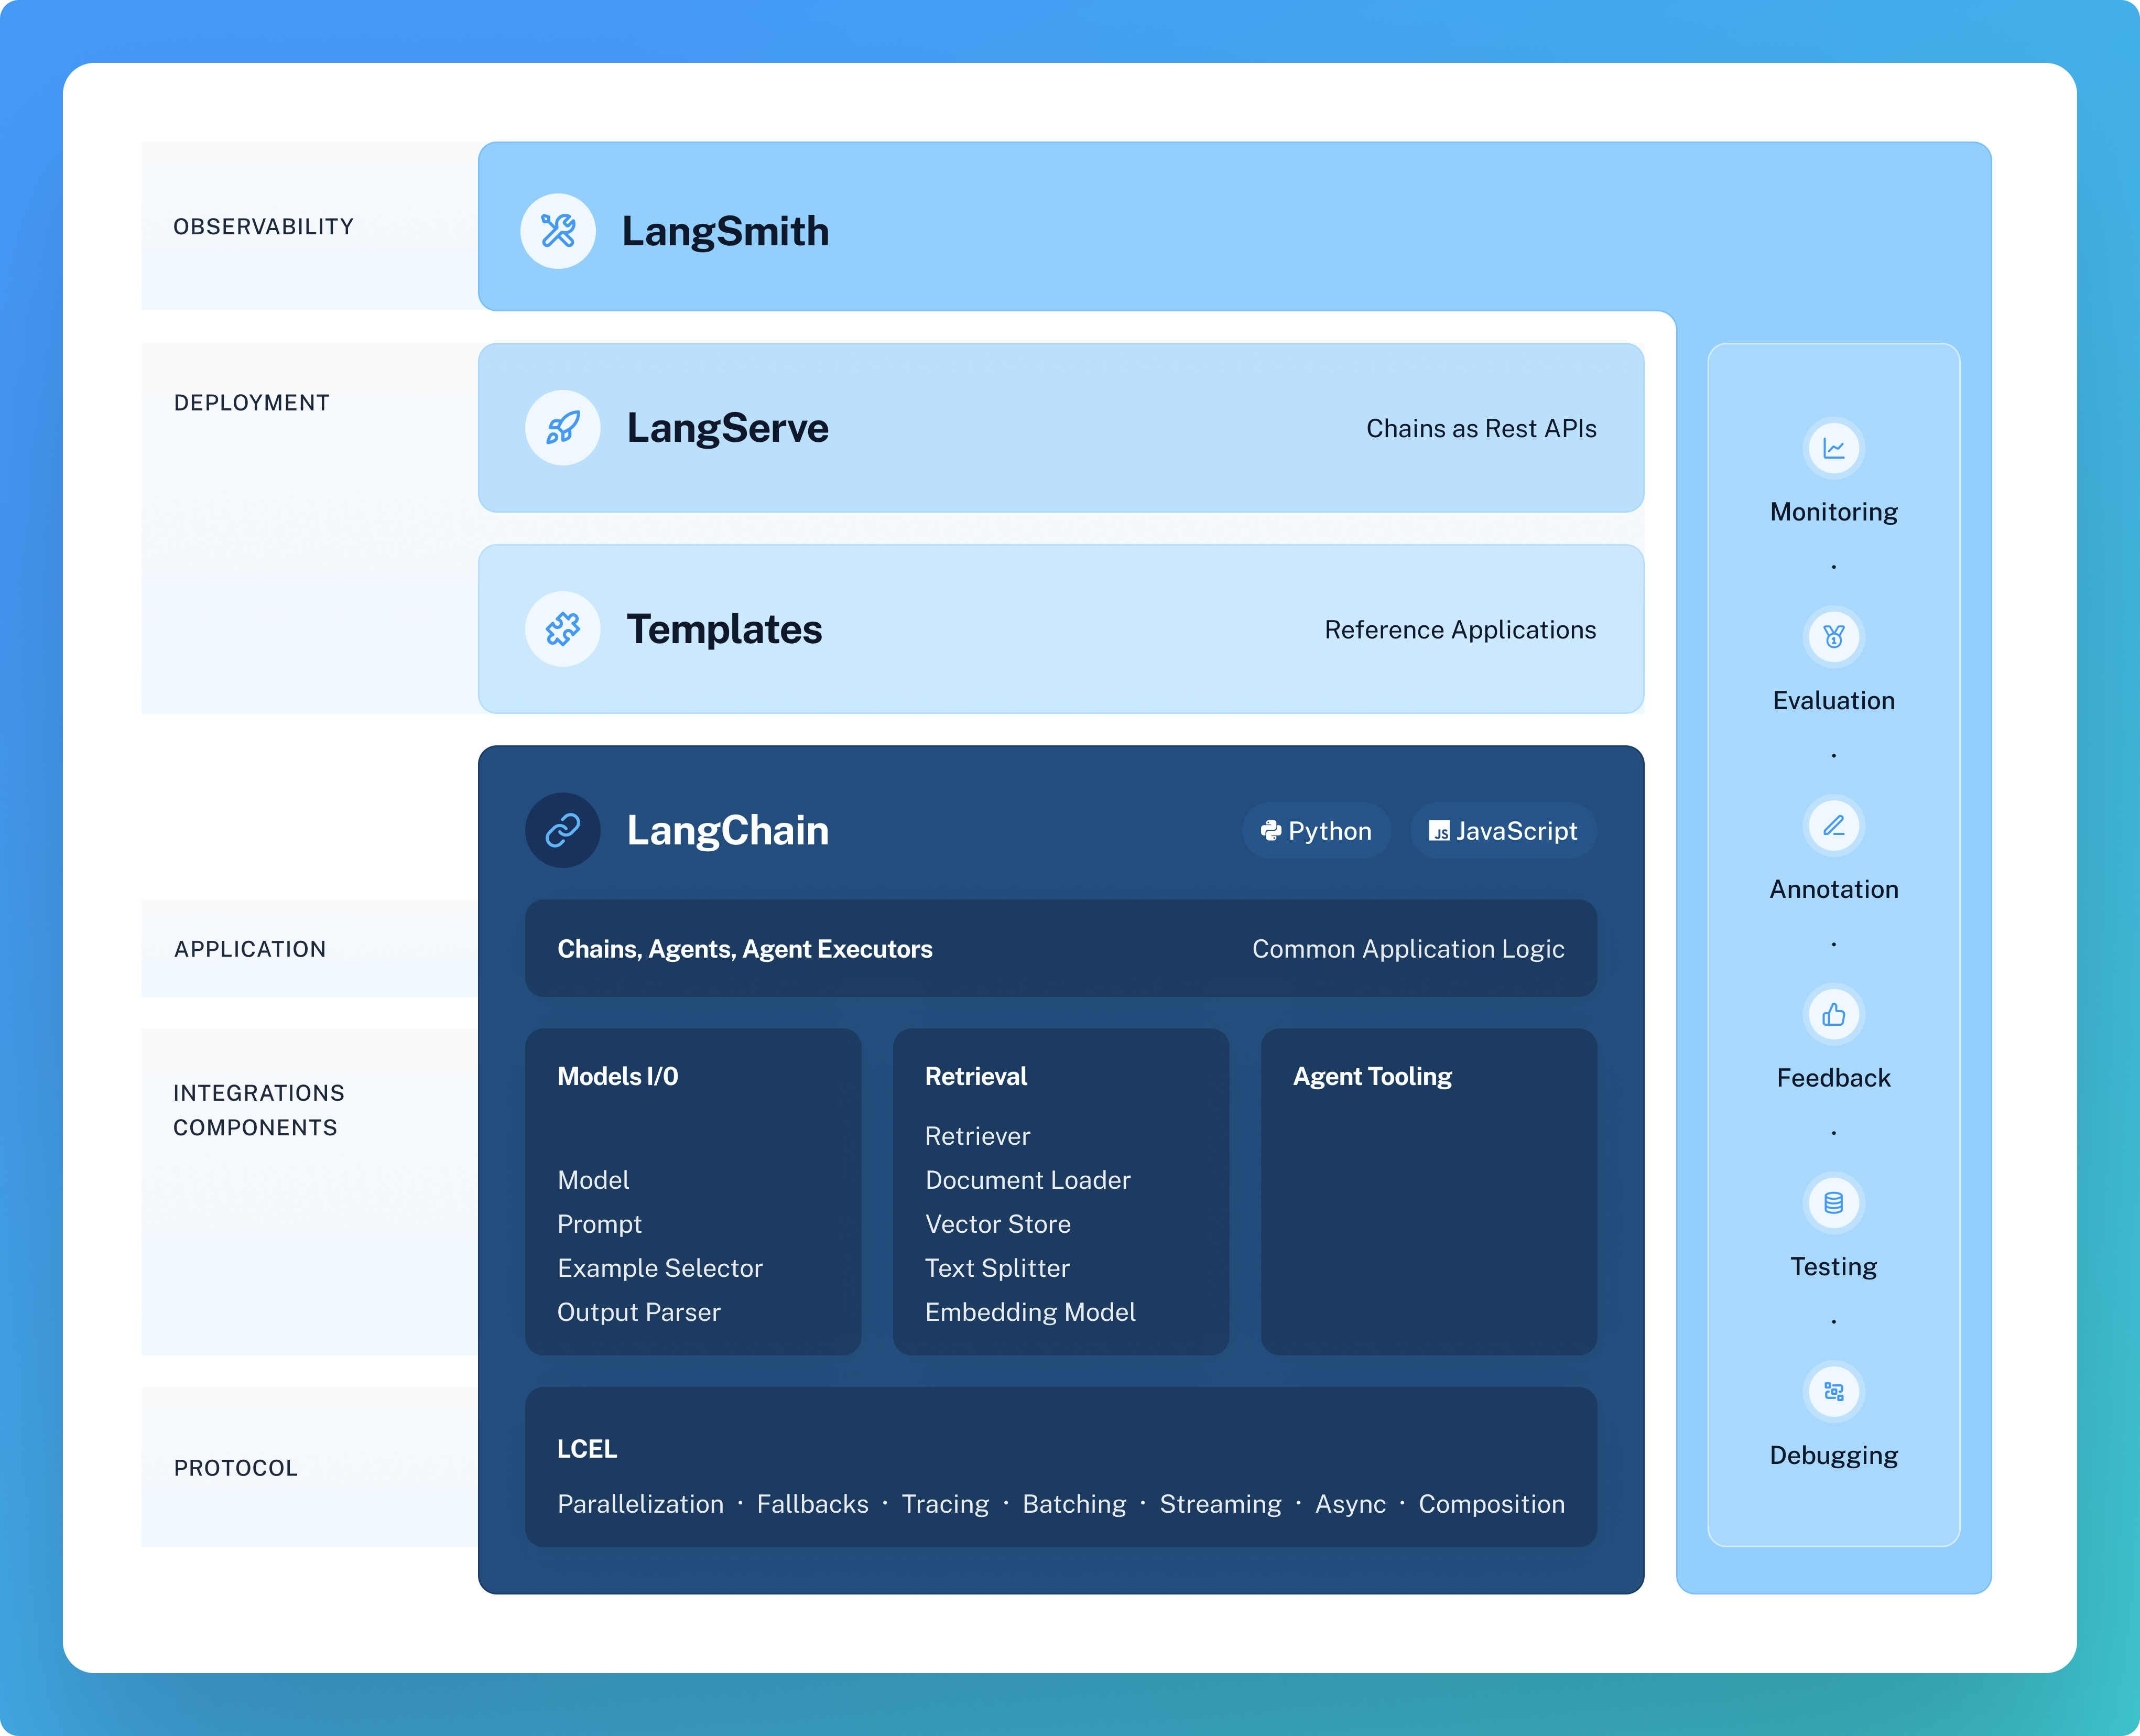

In [ ]:
from IPython import display
display.Image("https://raw.githubusercontent.com/langchain-ai/langchain/master/docs/static/img/langchain_stack.png", width=600)

In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain.schema.messages import HumanMessage, SystemMessage

In [ ]:
chat = ChatOpenAI(model="gpt-4-vision-preview", max_tokens=256)
chat.invoke(
    [
        HumanMessage(
            content=[
                {"type": "text", "text": "What is this image showing"},
                {
                    "type": "image_url",
                    "image_url": {
                        "url": "https://raw.githubusercontent.com/langchain-ai/langchain/master/docs/static/img/langchain_stack.png",
                        "detail": "auto",
                    },
                },
            ]
        )
    ]
)

AIMessage(content='This image appears to be a diagram or a graphical representation of a software stack or a platform architecture, possibly for a language processing or language service system, as indicated by terms like "LangSmith," "LangServe," and "LangChain."\n\nHere is the breakdown:\n\n1. **Observability**: This is likely a component or layer of the system that focuses on monitoring and logging the system\'s operation to ensure performance and reliability.\n\n2. **Deployment**: This might represent the tools or services used to deploy the language processing applications, including making them available as REST APIs.\n\n3. **Templates**: This could refer to pre-built templates for creating language processing applications or workflows.\n\n4. **LangChain**: This seems to be the core of the system, with the following elements:\n   - **Application**: Refers to chains, agents, and agent executors which are likely components that process language data.\n   - **Integrations Components

## [OpenAI assistants](https://platform.openai.com/docs/assistants/overview)

> The Assistants API allows you to build AI assistants within your own applications. An Assistant has instructions and can leverage models, tools, and knowledge to respond to user queries. The Assistants API currently supports three types of tools: Code Interpreter, Retrieval, and Function calling


You can interact with OpenAI Assistants using OpenAI tools or custom tools. When using exclusively OpenAI tools, you can just invoke the assistant directly and get final answers. When using custom tools, you can run the assistant and tool execution loop using the built-in AgentExecutor or easily write your own executor.

Below we show the different ways to interact with Assistants. As a simple example, let's build a math tutor that can write and run code.

## Using only OpenAI tools

In [ ]:
from langchain.agents.openai_assistant import OpenAIAssistantRunnable

In [ ]:
#OpenAIAssistantRunnable??

### Code-Interpreter

In [ ]:
interpreter_assistant = OpenAIAssistantRunnable.create_assistant(
    name="langchain assistant",
    instructions="You are a personal math tutor. Write and run code to answer math questions.",
    tools=[{"type": "code_interpreter"}],
    model="gpt-4-1106-preview",
)
output = interpreter_assistant.invoke({"content": "I need to solve the equation `3x + 11 = 14`. Can you help me?"})

In [ ]:
from pprint import pprint
pprint(str(output))

("[ThreadMessage(id='msg_RzPyq2QHTefyteLoChtummP2', "
 "assistant_id='asst_8BWpN4xdSBB5aHWpYGc9746i', "
 "content=[MessageContentText(text=Text(annotations=[], value='To solve the "
 'equation \\\\(3x + 11 = 14\\\\), we subtract 11 from both sides of the '
 'equation to get \\\\(3x = 3\\\\), and then we divide both sides by 3 to '
 "isolate \\\\(x\\\\). The solution to the equation is \\\\(x = 1\\\\).'), "
 "type='text')], created_at=1700771580, file_ids=[], metadata={}, "
 "object='thread.message', role='assistant', "
 "run_id='run_n1F8JP35NCbSZfrl5ljX4f42', "
 "thread_id='thread_yOl8GIcc3FgQIaGqMoqgJiKi')]")


### Retrieval

In [ ]:
from openai import OpenAI
client = OpenAI()

In [ ]:
# Upload a file with an "assistants" purpose
file = client.files.create(
  file=open("/content/gpt4all-paper.pdf", "rb"),
  purpose='assistants'
)

In [ ]:
file.id

'file-oyqr5GJoPo69jNTFGi6apbv6'

In [ ]:
#OpenAIAssistantRunnable??

In [ ]:
retrieval_assistant = OpenAIAssistantRunnable.create_assistant(
    name="langchain openai retrieval",
    instructions="Answer the question based on the context provided.",
    tools=[{"type": "retrieval"}],
    model="gpt-4-1106-preview",
)

In [ ]:
output = retrieval_assistant.invoke({"content": "Who are the authors of the paper?", "file_ids":[file.id]})

In [ ]:
from pprint import pprint
pprint(str(output))

("[ThreadMessage(id='msg_swR3BBWOKCdKC6DMKUMaMHzK', "
 "assistant_id='asst_cbWSnrNb2ad8B5JhqGaYAGBQ', "
 'content=[MessageContentText(text=Text(annotations=[TextAnnotationFileCitation(end_index=280, '
 "file_citation=TextAnnotationFileCitationFileCitation(file_id='file-oyqr5GJoPo69jNTFGi6apbv6', "
 "quote='Yuvanesh Anand\\nNomic AI\\nyuvanesh@nomic.ai \\n\\n\\nZach "
 'Nussbaum\\nNomic AI\\nzach@nomic.ai \\n\\n\\nAdam Treat\\nNomic '
 'AI\\nadam@nomic.ai \\n\\n\\nAaron Miller\\nNomic '
 'AI\\naaron@nomic.ai\\n\\n\\nRichard Guo\\nNomic AI\\nrichard@nomic.ai '
 "\\n\\n\\nBen Schmidt\\nNomic AI\\nben@nomic.ai \\n\\n\\nGPT4All Community'), "
 "start_index=270, text='【7†source】', type='file_citation')], value='The "
 'authors of the paper are:\\n\\n- Yuvanesh Anand\\n- Zach Nussbaum\\n- Adam '
 'Treat\\n- Aaron Miller\\n- Richard Guo\\n- Ben Schmidt\\n- Brandon '
 'Duderstadt\\n- Andriy Mulyar\\n\\nThey are affiliated with Nomic AI. '
 'Additionally, the paper also attributes authorship to 

In [ ]:
# Use regular expressions to extract just the answer (value)
import re
match = re.search(r"value='([^']+)'", str(output))

if match:
    extracted_value = match.group(1)
    # Replace '\\n' with actual line breaks
    extracted_text = extracted_value.replace('\\n', '\n')
    print(extracted_text)
else:
    print("Value not found in the given output.")

The authors of the paper are:

- Yuvanesh Anand
- Zach Nussbaum
- Adam Treat
- Aaron Miller
- Richard Guo
- Ben Schmidt
- Brandon Duderstadt
- Andriy Mulyar

They are affiliated with Nomic AI. Additionally, the paper also attributes authorship to the "GPT4All Community"【7†source】.


## As a LangChain agent with arbitrary tools

Now let's recreate this functionality using our own tools. For this example we'll use the [E2B sandbox runtime tool](https://e2b.dev/docs?ref=landing-page-get-started).

In [ ]:
%%capture
!pip install e2b duckduckgo-search

In [ ]:
from langchain.tools import DuckDuckGoSearchRun, E2BDataAnalysisTool

# https://e2b.dev/docs
tools = [E2BDataAnalysisTool(api_key="E2B_API_KEY"), DuckDuckGoSearchRun()]

In [ ]:
agent = OpenAIAssistantRunnable.create_assistant(
    name="langchain assistant e2b tool",
    instructions="You are a personal math tutor. Write and run code to answer math questions. You can also search the internet.",
    tools=tools,
    model="gpt-4-1106-preview",
    as_agent=True,
)

#### Using AgentExecutor

In [ ]:
from langchain.agents import AgentExecutor

agent_executor = AgentExecutor(agent=agent, tools=tools)

agent_executor.invoke({"content": "What's the weather in Helsinki today divided by 2.0"})

{'content': "What's the weather in Helsinki today divided by 2.0",
 'output': 'Based on the search results, the current temperature in Helsinki today is 45 degrees Fahrenheit. Now, let me calculate this temperature divided by 2.0 for you.\nThe weather in Helsinki today, when the temperature of 45 degrees Fahrenheit is divided by 2.0, results in 22.5 degrees Fahrenheit.',
 'thread_id': 'thread_a1Yua9AptcnfAwdM8DIQCM0q',
 'run_id': 'run_9AcNuWspnX2EBJNMYFaEsbqF'}

In [ ]:
from langchain.agents import AgentExecutor

agent_executor = AgentExecutor(agent=agent, tools=tools)

# answer will be in Fahrenheit. Lets ask it in Celsius.
response = agent_executor.invoke({"content": "What's the weather in Helsinki today in Celsius divided by 2.0."})

In [ ]:
pprint(response)

{'content': "What's the weather in Helsinki today in Celsius divided by 2.0.",
 'output': 'The current temperature in Helsinki is -2°C. To find the value of '
           '-2°C divided by 2.0, we can simply perform the division:\n'
           '\n'
           '-2°C ÷ 2.0 = -1°C\n'
           '\n'
           'Therefore, the temperature in Celsius divided by 2.0 is -1°C.',
 'run_id': 'run_wVz7tlp5Jm5M1OZ6UwjvivHV',
 'thread_id': 'thread_R3Bfu1WYtE9h8XkngvMycIsE'}


#### Custom execution

In [ ]:
from langchain.schema.agent import AgentFinish

# Define a function to execute an agent using a set of tools and an input
def execute_agent(agent, tools, input):
    # Create a map for quick access to tools by name
    tool_map = {tool.name: tool for tool in tools}

    # Invoke the agent with the initial input
    response = agent.invoke(input)

    # Continue processing until the response is an AgentFinish signal
    while not isinstance(response, AgentFinish):
        tool_outputs = []

        # Process each action in the response
        for action in response:
            # Invoke the corresponding tool with the action's input
            tool_output = tool_map[action.tool].invoke(action.tool_input)

            # Print information about the tool invocation
            print(action.tool, action.tool_input, tool_output, end="\n\n")

            # Append the tool output and tool call ID to the list
            tool_outputs.append(
                {"output": tool_output, "tool_call_id": action.tool_call_id}
            )

        # Invoke the agent with the aggregated tool outputs and additional information
        response = agent.invoke(
            {
                "tool_outputs": tool_outputs,
                "run_id": action.run_id,
                "thread_id": action.thread_id,
            }
        )

    # Return the final response after all iterations
    return response


In [ ]:
response = execute_agent(agent, tools, {"content": "I need to solve the equation `3x + 11 = 14`. Can you help me?"})
print(response.return_values["output"])

e2b_data_analysis {'python_code': "#Defining the equation\nfrom sympy import symbols, Eq, solve\nx = symbols('x')\nequation = Eq(3*x + 11, 14)\n# Solving the equation\nsolution = solve(equation, x)\n# Print the solution\nprint('The solution is:', solution)"} {"stdout": "", "stderr": "Traceback (most recent call last):\n  File \"/tmp/main-1700772284.317507.py\", line 1, in <module>\n    from sympy import symbols, Eq, solve\nModuleNotFoundError: No module named 'sympy'", "artifacts": []}

It seems that there was a problem because the `sympy` library is not available in the environment I'm using. However, for this simple equation, we can solve it manually.

The equation `3x + 11 = 14` can be solved by following these steps:

1. Subtract 11 from both sides of the equation:
   \(3x + 11 - 11 = 14 - 11\)
   This simplifies to:
   \(3x = 3\)

2. Divide both sides by 3:
   \(3x / 3 = 3 / 3\)
   This simplifies to:
   \(x = 1\)

Therefore, the solution to the equation is \(x = 1\).


#### Passing the earlier thread id to the next response.

In [ ]:
response.thread_id

'thread_jvEWF75n5nmdsNvIrhMwUpSW'

In [ ]:
next_response = execute_agent(
    agent, tools, {"content": "now add 2.241", "thread_id": response.thread_id}
)
print(next_response.return_values["output"])

e2b_data_analysis {'python_code': "# Adding 2.241 to the solution\noriginal_solution = 1\nnew_solution = original_solution + 2.241\n# Print the new solution\nprint('The new solution after adding 2.241 is:', new_solution)"} {"stdout": "The new solution after adding 2.241 is: 3.241", "stderr": "", "artifacts": []}

After adding 2.241 to the solution of the equation, the new solution is \(3.241\).


## [JSON mode](https://platform.openai.com/docs/guides/text-generation/json-mode)

Constrain the model to only generate valid JSON. Note that you must include a system message with instructions to use JSON for this mode to work.

Only works with certain models.

In [ ]:
chat = ChatOpenAI(model="gpt-3.5-turbo-1106").bind(
    response_format={"type": "json_object"}
)

output = chat.invoke(
    [
        SystemMessage(
            content="Extract the 'name' and 'origin' of any companies mentioned in the following statement. Return a JSON list."
        ),
        HumanMessage(
            content="Google was founded in the USA, while Deepmind was founded in the UK"
        ),
    ]
)
print(output.content)

{
  "companies": [
    {
      "name": "Google",
      "origin": "USA"
    },
    {
      "name": "Deepmind",
      "origin": "UK"
    }
  ]
}


In [ ]:
import json

json.loads(output.content)

{'companies': [{'name': 'Google', 'origin': 'USA'},
  {'name': 'Deepmind', 'origin': 'UK'}]}

## Tools

Use tools for parallel function calling.

In [ ]:
from typing import Literal

from langchain.output_parsers.openai_tools import PydanticToolsParser
from langchain.prompts import ChatPromptTemplate
from langchain.pydantic_v1 import BaseModel, Field
from langchain.utils.openai_functions import convert_pydantic_to_openai_tool


class GetCurrentWeather(BaseModel):
    """Get the current weather in a location."""

    location: str = Field(description="The city and country, e.g. Kathmandu, NPL")
    unit: Literal["celsius", "fahrenheit"] = Field(
        default="celsius", description="The temperature unit, default to celsius"
    )


prompt = ChatPromptTemplate.from_messages(
    [("system", "You are a helpful assistant"), ("user", "{input}")]
)
model = ChatOpenAI(model="gpt-3.5-turbo-1106").bind(
    tools=[convert_pydantic_to_openai_tool(GetCurrentWeather)]
)
chain = prompt | model | PydanticToolsParser(tools=[GetCurrentWeather])

chain.invoke({"input": "what's the weather in KTM, SF and HEL"})

[GetCurrentWeather(location='Kathmandu, NPL', unit='celsius'),
 GetCurrentWeather(location='San Francisco, US', unit='celsius'),
 GetCurrentWeather(location='Helsinki, FI', unit='celsius')]

## Play around, trial and error needed, the way we interact might differ as the field of AI and how we interact is changing drastically.